In [39]:
# Gacha Project

# This is a project which discusses and further analyzes the Gacha System and its probabilities.
# Since every Gacha Game differs in many ways, whether it's the rarity of items or their drop rates, 
# it makes sense to focus on the Gacha System of a singular game rather than generalizing the topic.
# For this project, we will be using the rarities and probabilities of the game "Genshin Impact".

# in the Genshin Impact Gacha System, the base probability to get a 5* Character lies at 0.6%, or 6 in 1000.
# additionally, the hard pity lies at 90, meaning if you reach the 90th pull, you will get a 5* with a 100% chance.

# following only those probabilities, our chances would look like this:
# Figure 1) shows the per-pull probability, speak: the individual probability at each pull x
# for example: 35: the chance to get a 5* at the 35th pull is 0.6%.
# it shows that starting at 1 and throughout 89, our chances lie at 0.6 %, and at 90, it increases to 100%.
# Figure 2) shows the cumulative probability, speak: the probability to get a 5* character up until that point.
# for example: 35: the chance to get a 5* character within 35 pulls is ~ 19%.
# it shows that if we count it together, we have a ~ 41 % chance to get our 5* character before reaching the 90th pull.

# however, if we compare the probabilities of Figure 1) and 2) with real player data (see Figure 5)), we can easily see that 
# most players get their 5* character close to the 77th pull, and an incredibly small number of players even reach the 90th pull
# (0.0003 %, which would be 3 players out of 100000 !)
# but why?

# this is because the Genshin Impact Gacha System has something called "soft pity".
# soft pity is a territory, specifically in the range of the 74th and 90th pull, where the probability of getting a 5* character 
# increases by the same amount with every pull.
# if our base probability is 0.6% and we know that the soft pity starts at 74 and has to reach 100% by the 90th pull,
# the only amount that makes sense is 6%.
# this means that when a player reaches the 74th pull, their chance for a 5* is increased by 6%, so 74th pull = 6.6%
# so if every next pull gains the same amount of chance, we would have the 75th pull with 12.6%, the 76th with 18.6% and so on.
# if every pull has an increased chance of 6%, we reach 96.6% at 89, and the first time we reach ~100% is at the 90th pull.
# (Full list at: https://ibb.co/QDcc5NJ)

# so if we consider soft pity, our per-pull probability looks like Figure 3) and our cummulative probability like Figure 4),
# which looks a lot more like our actual player data!

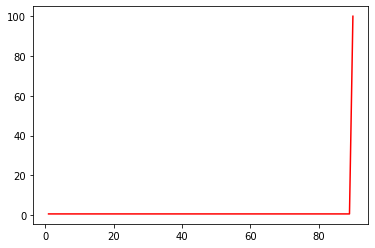

1) Per-pull probability, soft pity not considered


In [30]:
import matplotlib.pyplot as plt
x=[1,89,90]
y= [0.6,0.6,100]
plt.plot(x,y, color='r')
plt.show()
print('1) Per-pull probability, soft pity not considered')

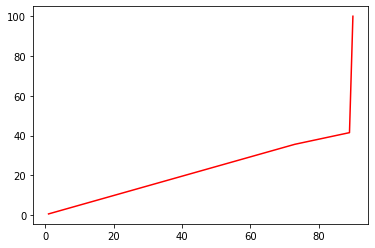

2) Cumulative probability, soft pity not considered


In [37]:
import matplotlib.pyplot as plt
x=[1,73,89,90]
y= [0.6,35.6,41.469,100]
plt.plot(x,y, color='r')
plt.show()
print('2) Cumulative probability, soft pity not considered')

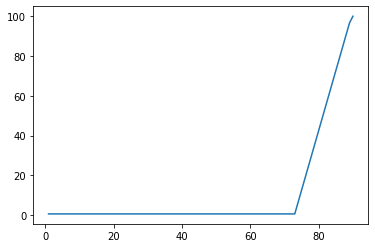

3) Per-pull probability with soft pity


In [38]:
import matplotlib.pyplot as plt
x=[1,70,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]
y= [0.6,0.6,0.6,6.6,12.6,18.6,24.6,30.6,36.6,42.6,48.6,54.6,60.6,66.6,72.6,78.6,84.6,90.6,96.6,100]
plt.plot(x,y)
plt.show()
print('3) Per-pull probability with soft pity')

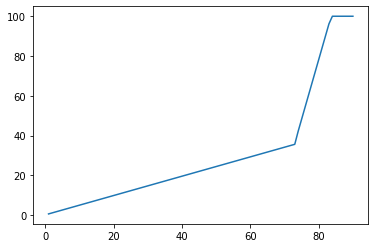

4) Cumulative probability with soft pity


In [31]:
import matplotlib.pyplot as plt
x=[1,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]
y= [0.6,35.6,42.2,48.2,54.2,60.2,66.2,72.2,78.2,84.2,90.2,96.2,100,100,100,100,100,100,100]
plt.plot(x,y)
plt.show()
print('4) Cumulative probability with soft pity')

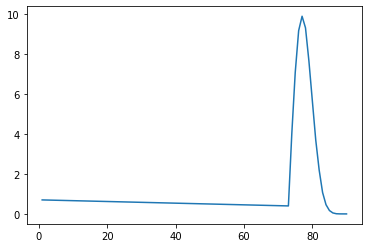

5) Successful 5* pulls on Example Banner: "Everbloom Violet: Yae Miko"
Source: https://paimon.moe/wish/tally?id=300026
Total 5* pulls: 366,844
Peak at 77 with 36258 5* pulls (9.88%)


In [36]:
import matplotlib.pyplot as plt
x=[1,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]
y= [0.7,0.4,4.02,7.07,9.16,9.88,9.3,7.64,5.66,3.69,2.19,1.07,0.46,0.17,0.05,0.01,0.002,0.001,0.0003]
plt.plot(x,y)
plt.show()
print('5) Successful 5* pulls on Example Banner: "Everbloom Violet: Yae Miko"')
print('Source: https://paimon.moe/wish/tally?id=300026')
print('Total 5* pulls: 366,844')
print('5* Median: 75')
print('Peak at 77 with 36258 5* pulls (9.88%)')

Number of pulls: 300
Got a four star on pull number 10
After 10 and a probability of 1000/1000
It was a pity pull
Got a four star on pull number 20
After 10 and a probability of 1000/1000
It was a pity pull
Got a four star on pull number 27
After 7 and a probability of 51/1000
Got a four star on pull number 37
After 10 and a probability of 1000/1000
It was a pity pull
Got a four star on pull number 47
After 10 and a probability of 1000/1000
It was a pity pull
Got a four star on pull number 57
After 10 and a probability of 1000/1000
It was a pity pull
Got a four star on pull number 67
After 10 and a probability of 1000/1000
It was a pity pull
Got a five star on pull number 75
After 75 and a probability of 126/1000
It was a soft pity pull with more chance than usual
Got a four star on pull number 78
After 10 and a probability of 1000/1000
It was a pity pull
Got a four star on pull number 88
After 10 and a probability of 1000/1000
It was a pity pull
Got a four star on pull number 96
After

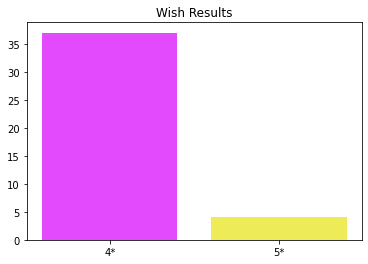

In [25]:
# Genshin Wish Generator
# This code generates wish results on its own based on Genshin Impact probabilities
# For putting in your current pity yourself, go to the next cell

import sys
import math
import random
import matplotlib.pyplot as plt
import numpy as np

def main(args):
	FiveStarsCount = 0
	FourStarsCount = 0
	PullsSinceLast5Stars = 0
	PullsSinceLast4Stars =0
    
    
	FiveStarPityList = []
	FourStarPityList = []

	numberOfPulls = getNumberOfPulls()
	i = 0
	pullsList5Stars = []
	pullsList4Stars = []


	while i <= numberOfPulls:

		chanceOf5Stars = calculate5StarsChance(PullsSinceLast5Stars)
		chanceOf4Stars = calculate4StarsChance(PullsSinceLast4Stars)

		number = random.randint(0, 1000)

		if (number < chanceOf5Stars):
			gotFiveStars(i, PullsSinceLast5Stars, chanceOf5Stars)
			pullsList5Stars.append(i)
			FiveStarPityList.append(PullsSinceLast5Stars)
			PullsSinceLast5Stars = 1
			FiveStarsCount += 1

		elif (number >= chanceOf5Stars and number <= chanceOf5Stars + chanceOf4Stars):
			gotFourStars(i, PullsSinceLast4Stars, chanceOf4Stars)
			FourStarsCount += 1
			pullsList4Stars.append(i)
			FourStarPityList.append(PullsSinceLast4Stars)
			PullsSinceLast4Stars = 1
			PullsSinceLast5Stars += 1

		else:
			PullsSinceLast5Stars += 1
			PullsSinceLast4Stars += 1

		i += 1
		#print(i)


	print("\n\n\n")
	print("\033[93mGot " + str(FiveStarsCount) + " five stars at pulls number:")
	print(pullsList5Stars)
	print("\033[93mGot " + str(FiveStarsCount) + " five stars at pity:")
	print(FiveStarPityList)
	print("\033[93mFive stars median:")
	print(int(sum(FiveStarPityList)/FiveStarsCount))
    
    
	print("\n")
	print("\033[95mGot " + str(FourStarsCount) + " four stars at pulls number:")
	print(pullsList4Stars)
	print("\033[95mGot " + str(FourStarsCount) + " four stars at pity:")
	print(FourStarPityList)
	print("\033[95mFour stars median:")
	print(int(sum(FourStarPityList)/FourStarsCount))

	Rarity = ['4*', '5*']
	Results = [FourStarsCount, FiveStarsCount]

	plt.bar(Rarity, Results, color=['#E349FD', '#EEEB59'])
	plt.title("Wish Results")
	plt.show()
	plt.close()

	#sys.exit(0)



def getNumberOfPulls():
	try:
		numberOfPulls = int(input("Number of pulls: "))
		return numberOfPulls
	except Exception as e:
		print("Please enter an integer!")
		return getNumberOfPulls()

def gotFiveStars(pullNumber, sinceLast, probability):
	print("==========")
	print("\033[93mGot a five star on pull number " + str(pullNumber))
	print("After " + str(sinceLast) + " and a probability of " + str(probability) + "/1000")
	if sinceLast > 74:
		print("It was a soft pity pull with more chance than usual")

def gotFourStars(pullNumber, sinceLast, probability):
	print("==========")
	print("\033[95mGot a four star on pull number " + str(pullNumber))
	print("After " + str(sinceLast) + " and a probability of " + str(probability) + "/1000")
	if sinceLast > 9:
		print("It was a pity pull")

def calculate5StarsChance(sinceLast):
	if sinceLast < 74:
		return 6
	elif sinceLast >= 74 and sinceLast < 89:
		return 6 + (60 * (sinceLast-73))
	else:
		return 1000

def calculate4StarsChance(sinceLast):
	if sinceLast == 10:
		return 1000
	else:
		return 51


if __name__ == "__main__":
	main(sys.argv)
    
    

Genshin Probability Calculator

What is your 5 star pity at the moment? 75

Pity 75: You're in soft pity territory! Your next pull has a 18.6% chance to be a 5 star!
15 more pulls to your guaranteed 5 star!


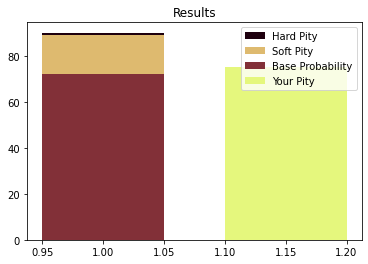

In [26]:
# Genshin Probability Calculator
# Here, users can input their current Five Star Pity and get info about the prob of their next pulls
print("Genshin Probability Calculator\n")
import matplotlib.pyplot as plt

def getPity():
	try:
		pity = int(input("\033[90mWhat is your 5 star pity at the moment? "))
		return pity
	except Exception as e:
		print("\033[91mPlease enter an integer between 0 and 89!")
		return getPity()

def main(args):
    #print("What is your 5 star pity at the moment?")
    #F = input()
    FiveStarPity = getPity()

    pullsToSoftPity = 73 - FiveStarPity



    if FiveStarPity <= 72:
        print("\033[90mPity " + str(FiveStarPity) + ": You are still at full odds! Your next pull has a 0.6% chance to be a 5 star!\n")
        print(str(pullsToSoftPity) + "\033[90m more pulls until soft pity territory!")


    # soft pity territory
    print('\033[93m')
    if FiveStarPity > 72:
        if FiveStarPity == 73:
            print("Pity 73: You're in soft pity territory! Your next pull has a 6.6% chance to be a 5 star!")
        if FiveStarPity == 74:
            print("Pity 74: You're in soft pity territory! Your next pull has a 12.6% chance to be a 5 star!")
        if FiveStarPity == 75:
            print("Pity 75: You're in soft pity territory! Your next pull has a 18.6% chance to be a 5 star!")
        if FiveStarPity == 76:
            print("Pity 76: You're in soft pity territory! Your next pull has a 24.6% chance to be a 5 star!")
        if FiveStarPity == 77:
            print("Pity 77: You're in soft pity territory! Your next pull has a 30.6% chance to be a 5 star!")
        if FiveStarPity == 78:
            print("Pity 78: You're in soft pity territory! Your next pull has a 36.6% chance to be a 5 star!")
        if FiveStarPity == 79:
            print("Pity 79: You're in soft pity territory! Your next pull has a 42.6% chance to be a 5 star!")
        if FiveStarPity == 80:
            print("Pity 80: You're in soft pity territory! Your next pull has a 48.6% chance to be a 5 star!")
        if FiveStarPity == 81:
            print("Pity 81: You're in soft pity territory! Your next pull has a 54.6% chance to be a 5 star!")
        if FiveStarPity == 82:
            print("Pity 82: You're in soft pity territory! Your next pull has a 60.6% chance to be a 5 star!")
        if FiveStarPity == 83:
            print("Pity 83: You're in soft pity territory! Your next pull has a 66.6% chance to be a 5 star!")
        if FiveStarPity == 84:
            print("Pity 84: You're in soft pity territory! Your next pull has a 72.6% chance to be a 5 star!")
        if FiveStarPity == 85:
            print("Pity 85: You're in soft pity territory! Your next pull has a 78.6% chance to be a 5 star!")
        if FiveStarPity == 86:
             print("Pity 86: You're in soft pity territory! Your next pull has a 84.6% chance to be a 5 star!")
        if FiveStarPity == 87:
            print("Pity 87: You're in soft pity territory! Your next pull has a 90.6% chance to be a 5 star!")
        if FiveStarPity == 88:
            print("Pity 88: You're in soft pity territory! Your next pull has a 96.6% chance to be a 5 star!")
        if FiveStarPity == 89:
            print("Pity 89: You reached hard pity! That's unlucky, but your next pull is a 5 star!")

    if FiveStarPity <= 89:    
        FiveStarPredict = 90 - FiveStarPity  
        print('\033[93m' + str(FiveStarPredict) + " more pulls to your guaranteed 5 star!")


        Pity = ['Pity']
        Results = [FiveStarPity]
        HardPity = 90

        plt.bar(1, 90, color = ['#1e000e'], label = 'Hard Pity', width = 0.1)  
        plt.bar(1, 89, color = ['#deba6f'], label = 'Soft Pity', width = 0.1) 
        plt.bar(1, 72, color = ['#823038'], label = 'Base Probability', width = 0.1) 
        plt.bar(1.15, Results, color=['#e5f77d'], label = 'Your Pity', width = 0.1)
        plt.title("Results")
        plt.legend()
        plt.show()
        plt.close() 

    if FiveStarPity > 89:
        print("\033[91mHaving a pity greater than 89 is not possible! Please check again!")
        print("\033[90m")
        main(args)

                

if __name__ == "__main__":
	main(sys.argv)                



